**Explorative & Community Analysis of a Movie Galaxies Dataset**

Ema Ilic
200837
e.ilic@alumnos.upm.es

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import networkx as nx
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import collections
import statistics 
import time
import random
import pandas as pd
import math
import community 

In [ ]:
#pip install python-louvain

In [ ]:
class DataSet:
  def __init__(self, folder):
    def addMovie(file):
      id = file.split(".")[0]
      path = join(folder, file)
      graph = nx.read_gexf(path)
      graph.movie_id = int(id)
      self.movies.append(graph)
    self.movies = []
    for f in listdir(folder):
      addMovie(f)

In [ ]:
data = DataSet('/content/drive/MyDrive/CoolData/data gang')

In [ ]:
excelData = pd.read_csv("/content/drive/MyDrive/CoolData/imdb.csv")
excelData

,"""mov_galaxy_ID""","""imdbID""","""title""","""rating"""
0,"""001""","""0147800""","""10 Things I Hate About You""","""7.2"""
1,"""003""","""0417385""","""12 and Holding""","""7.6"""
2,"""005""","""1542344""","""127 Hours""","""7.6"""
3,"""006""","""0103594""","""1492: Conquest of Paradise""","""6.5"""
4,"""007""","""0179626""","""15 Minutes""","""6.1"""
...,...,...,...,...
750,"""908""","""0295701""","""xXx""","""5.8"""
751,"""910""","""1068680""","""Yes Man""","""6.8"""
752,"""911""","""0203230""","""You Can Count on Me""","""7.7"""
753,"""913""","""0403702""","""Youth in Revolt""","""6.5"""


It was observed that some movies present in the movie galaxies dataset do not have a corresponding line in the imdb file. The possible interpretation here might be that these movies are just not on imdb website.





In [ ]:
def getKey(movieId):
  idString = str(movieId)
  if movieId < 10:  idString = "0" + idString
  if movieId < 100: idString = "0" + idString
  return '"' + idString + '"'

Movies = data.movies

for movie in Movies:
  movie.movie_name = excelData['"title"'][excelData['"mov_galaxy_ID"'] == getKey(movie.movie_id)].to_string(index=False)

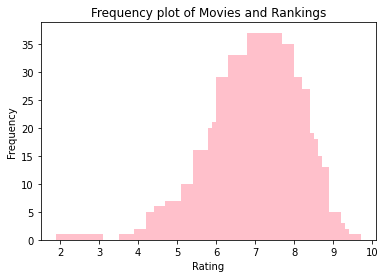

In [ ]:
ratings = sorted([float(x[1:-1]) for x in excelData['"rating"'].tolist() if x != '"?"'])
R = collections.Counter(ratings)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Frequency plot of Movies and Rankings")
plt.bar(list(R.keys()), list(R.values()),color='pink')
plt.show()

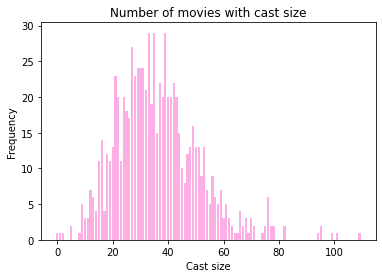

In [ ]:
C = collections.Counter([len(d.nodes) for d in Movies])
plt.xlabel("Cast size")
plt.ylabel("Frequency")
plt.title("Number of movies with cast size")
plt.bar(list(C.keys()), list(C.values()), color='#FCAFE4')
plt.show()

In [ ]:
top10Cast = sorted(Movies, key = lambda i: len(i.nodes), reverse=True)[:9]
print('Ten Movies with the largest cast:')
for movie in top10Cast:
  print('Movie', movie.movie_name,' had the cast of size ',len(movie.nodes),'.')

Ten Movies with the largest cast:
Movie  "Casino"  had the cast of size  109 .
Movie  "JFK"  had the cast of size  101 .
Movie  "Public Enemies"  had the cast of size  99 .
Movie  "The Doors"  had the cast of size  95 .
Movie  "Airplane II: The Sequel"  had the cast of size  95 .
Movie  "Forrest Gump"  had the cast of size  94 .
Movie  "Catch Me If You Can"  had the cast of size  82 .
Movie  "Magnolia"  had the cast of size  82 .
Movie  "The Godfather: Part II"  had the cast of size  78 .


In [ ]:
top10Cast = sorted(Movies, key = lambda i: len(i.nodes), reverse=False)[:12]
print('Top 10 Movies with the smallest cast:')
for movie in top10Cast[3:]:
   print('Movie', movie.movie_name,' had the cast of size ',len(movie.nodes),'.')
  #here we ignored all the movies which do not have a defined name. to do for the next time. eliminate them from the dataset

Top 10 Movies with the smallest cast:
Movie  "The Evil Dead"  had the cast of size  5 .
Movie  "Solyaris"  had the cast of size  5 .
Movie  "Dark Star"  had the cast of size  8 .
Movie  "The Breakfast Club"  had the cast of size  9 .
Movie  "Cashback"  had the cast of size  9 .
Movie  "127 Hours"  had the cast of size  9 .
Movie  "Kings of the Turf"  had the cast of size  9 .
Movie  "Timber Falls"  had the cast of size  9 .
Movie  "Entrapment"  had the cast of size  10 .


In [ ]:
def get_movies_with_id(ids):
  idmovies = []
  for movie in Movies:
    if movie.movie_id not in ids:  continue
    idmovies.append(movie)
  return idmovies

def get_multigraph(movies):
  G = nx.Graph()
  for movie in movies:
    for edge in movie.edges:
        G.add_edge(edge[0], edge[1], title=movie.movie_name)
    print(f'Added {movie.movie_name} to multigraph.')
  return G

The idea was to create a multigraph of a movie sequence, such as the Alien sequence (five movies). With the intention to observe the relationships between the same characters through different movies, the problem encountered here was the fact that the same characters have different IDs in different movies. Thus, the possible alternative would've been to relabel node IDs or to use the node attribute 'label' instead of the node ID to establish the connections.


In [ ]:
alien_multi = get_multigraph(get_movies_with_id([38, 39, 40, 41, 42]))

print("Number of nodes in simple graph  =", alien_multi.number_of_nodes())
print("Number of edges in simple graph  =", alien_multi.number_of_edges())
print("Graph Connected?                 =", nx.is_connected(alien_multi))

Added  "Alien: Covenant" to multigraph.
Added  "Alien Nation" to multigraph.
Added  "AVP: Alien vs. Predator" to multigraph.
Added  "Alien: Resurrection" to multigraph.
Added  "Aliens" to multigraph.
Number of nodes in simple graph  = 130
Number of edges in simple graph  = 482
Graph Connected?                 = False


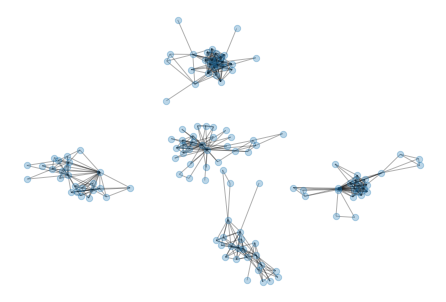

<Figure size 500x500 with 0 Axes>

In [ ]:
pos = nx.spring_layout(alien_multi, k=0.12, iterations=25)
nx.draw(alien_multi, pos, cmap = plt.get_cmap('jet'), with_labels=False, node_size=40, alpha=0.3 )
figure(figsize=(5,5), dpi=100)
plt.show()

As can be witnessed from the plot above, the graphs are not connected as the node ids were completely different for all the movies, even for the characters which are repeated throughout the movies.


---

---





** Visual representation of the Final Destination movie graph network together with character names as labels. **



In [ ]:
final_destionation_graph = get_movies_with_id([310])[0]

print('Number of edges: ',final_destionation_graph .number_of_edges())
print('Number of nodes: ',final_destionation_graph .number_of_nodes())

Number of edges:  150
Number of nodes:  31


In [ ]:
def get_graph_labels_dict(graph):
  nodeGraphLabelAttributes = graph.nodes(data="label")
  return dict(nodeGraphLabelAttributes)

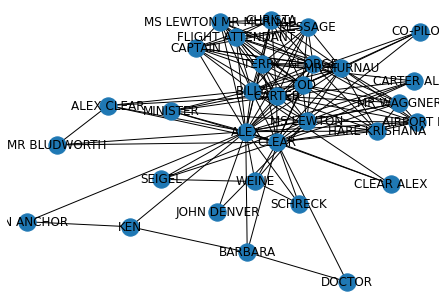

In [ ]:
nx.draw(final_destionation_graph , cmap = plt.get_cmap('jet'),  with_labels=True, labels=get_graph_labels_dict(final_destionation_graph ))
plt.show() #

Ego graph for the Movie UP tells us much about the main character (Carl) and its connections to the side characters.

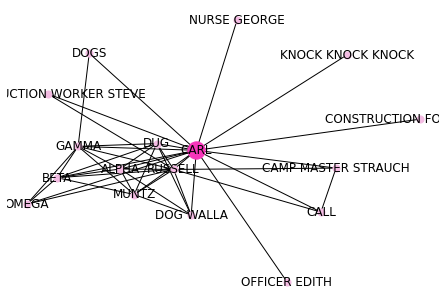

In [ ]:
from operator import itemgetter

import matplotlib.pyplot as plt
import networkx as nx

up = get_movies_with_id([857])[0]
# find node with largest degree
node_and_degree = up.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(up, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego, k=0.6, iterations=100)
nx.draw(hub_ego, pos, node_color="#F3BBE2", node_size=50, alpha=1, with_labels=True, labels=get_graph_labels_dict(hub_ego))

# Draw ego as large and red
options = {"node_size": 300, "node_color": "#F736BB"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

**Giant Component Network of the Godfather II movie**

A giant component is a connected component of a network that contains a significant proportion of the entire nodes in the network. Typically as the network expands the giant component will continue to have a significant fraction of the nodes.

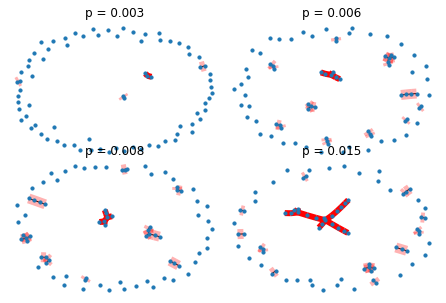

In [ ]:

from networkx.drawing.nx_agraph import graphviz_layout as layout
layout = nx.spring_layout

gf = get_movies_with_id([356])[0]
#356 godfather II

n = len(gf.nodes)
p_giant = 1.0 / (n - 1)
p_conn = math.log(n) / float(n)

pvals = [0.003, 0.006, 0.008, 0.015]
#pvals = [0.005, 0.008, 0.01, 0.015]


region = 220 
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.01, hspace=0.01)
for p in pvals:
    giant_subgraph = nx.binomial_graph(n, p)
    pos = layout(giant_subgraph)
    region += 1
    plt.subplot(region)
    plt.title(f"p = {p:.3f}")
    nx.draw(giant_subgraph, pos, with_labels=False, node_size=10)
    # identify largest connected component
    Gcc = sorted(nx.connected_components(giant_subgraph), key=len, reverse=True)
    G0 = giant_subgraph.subgraph(Gcc[0])
    nx.draw_networkx_edges(G0, pos, edge_color="r", width=6.0)
    # show other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(
                giant_subgraph.subgraph(Gi), pos, edge_color="r", alpha=0.3, width=10.0,
            )
plt.show()

**Betweenness Centrality Analysis**

In [ ]:
for node in gf.nodes:
  print(gf.nodes[node]['Betweenness Centrality'])



0.0
0.0
121.53515821983312
0.0
0.0
0.0
309.6806762381065
0.0
43.79897025632321
0.0
56.2285714285715
24.00868517447464
12.740115440115439
0.0
105.15208251787203
76.0
0.0
143.94561617719523
0.0
0.0
0.0
0.0
188.55296291399233
0.0
12.941798941798941
1041.8418933219632
0.0
10.466666666666667
0.0
0.0
84.34583172818462
0.0
0.0
23.4714285714286
0.25
93.27864300731947
36.420223636013105
43.79897025632321
1007.7523443446818
0.0
0.0
176.98406862745088
42.843570795389674
0.0
372.8874623198152
0.0
0.0
0.0
0.0
84.67731508257822
0.0
46.90238095238095
0.0
0.0
0.0
22.699372794961043
0.0
233.58014705882354
3.2
10.53809523809523
0.0
36.54801587301587
111.25833333333333
0.0
0.0
0.0
0.0
105.15208251787203
0.0
966.1981751134996
0.0
0.0
0.0
537.3203414519204
0.0
0.0
0.0
0.0


In [ ]:
x = sorted(gf, key = lambda i: gf.nodes[i]['Betweenness Centrality'], reverse=True)[:15]
for node in x:
  print(gf.nodes(data="label")[node], gf.nodes[node]['Betweenness Centrality'])

HAGEN 1041.8418933219632
MICHAEL 1007.7523443446818
TESSIO 966.1981751134996
VITO 537.3203414519204
PENTANGELI 372.8874623198152
CLEMENZA 309.6806762381065
ROTH 233.58014705882354
FREDO 188.55296291399233
NERI 176.98406862745088
FANUCCI 143.94561617719523
ANTHONY 121.53515821983312
SENATOR KANE 111.25833333333333
DON CORLEONE 105.15208251787203
SONNY 105.15208251787203
MAMA 93.27864300731947


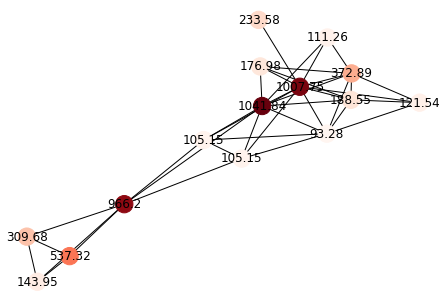

In [ ]:
H = gf.subgraph(x)
color_map = []
for node in H:
    betweeness = H.nodes[node]['Betweenness Centrality']
    color_map.append(betweeness)
nx.draw(H, cmap = plt.get_cmap('Reds'), node_color=color_map, with_labels=True, labels=dict(map(lambda y: (y, round(H.nodes[y]['Betweenness Centrality'],2)), H)))

In [ ]:
eigenvector_dict = nx.eigenvector_centrality(gf)

sorted_ei = sorted(eigenvector_dict.items(), key= lambda y: y[1], reverse=True)
print(sorted_ei)

[('2153089', 0.39303361761600225), ('2153258', 0.3168750501923187), ('2152857', 0.3153741969557995), ('2152996', 0.26376966649545214), ('2152769', 0.25433103154096603), ('2152802', 0.24028558140366565), ('2152930', 0.23497871313353424), ('2153323', 0.23497871313353424), ('2152849', 0.20701723554305307), ('2153116', 0.19421396953902512), ('2152750', 0.1914504089409084), ('2154179', 0.13943171643763386), ('2153471', 0.13510285521044438), ('2153077', 0.1333976293141604), ('2153720', 0.11889854683825), ('2159963', 0.1044460152776656), ('2156335', 0.10301412066119768), ('2162455', 0.10246259372240113), ('2162430', 0.10246259372240113), ('2153104', 0.10068032547413137), ('2153084', 0.10068032547413137), ('2157584', 0.09871315116727844), ('2158833', 0.09469923189101927), ('2153640', 0.08522509343538348), ('2156621', 0.08246811347862208), ('2160637', 0.07212962340529044), ('2152886', 0.06963210526754801), ('2157195', 0.06453941176723348), ('2157493', 0.05980092042622236), ('2157740', 0.0565374

In [ ]:
for node in sorted_ei:
  print(gf.nodes(data="label")[node[0]], node[1])

MICHAEL 0.39303361761600225
HAGEN 0.3168750501923187
FREDO 0.3153741969557995
PENTANGELI 0.26376966649545214
KAY 0.25433103154096603
MAMA 0.24028558140366565
CONNIE 0.23497871313353424
MERLE 0.23497871313353424
DEANNA 0.20701723554305307
NERI 0.19421396953902512
ANTHONY 0.1914504089409084
ROCCO 0.13943171643763386
OLA 0.13510285521044438
SANDRA 0.1333976293141604
SENATOR GEARY 0.11889854683825
SENATOR KANE 0.1044460152776656
MAN 0.10301412066119768
DON CORLEONE 0.10246259372240113
SONNY 0.10246259372240113
FRANCESCA 0.10068032547413137
GARDNER 0.10068032547413137
CORNGOLD 0.09871315116727844
QUESTADT 0.09469923189101927
MAESTRO 0.08522509343538348
ROTH 0.08246811347862208
SENATOR ROGERS 0.07212962340529044
WAITER 0.06963210526754801
COURIER 0.06453941176723348
SAM ROTH 0.05980092042622236
ANOTHER MAN 0.056537436401243375
FBI MAN #1 0.05642714593991692
FBI MAN #2 0.05642714593991692
TESSIO 0.05322271074887588
MOM 0.0509320782882563
MRS BARRETT 0.048066780411738785
PHOTOGRAPHER 0.0480667

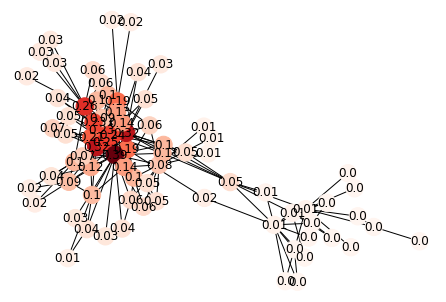

In [ ]:
H = gf
color_map = []
for node in H:
    eigen = eigenvector_dict[node]
    color_map.append(eigen)
nx.draw(H, cmap = plt.get_cmap('Reds'), node_color=color_map, with_labels=True, labels=dict(map(lambda y: (y, round(eigenvector_dict[y],2)), H)))

**Community Analysis of the Godfather II movie**

In [ ]:
dendrogram=community.generate_dendrogram(gf)
pt_lv0 = community.partition_at_level(dendrogram, 0)
pt_lv1 = community.partition_at_level(dendrogram, 1)
print(dendrogram)
for level in range (len(dendrogram)):
  print("partition at level: ", level, "is", community.partition_at_level(dendrogram, level))

[{'2159685': 1, '2157740': 0, '2152750': 8, '2155010': 1, '2159495': 4, '2159941': 12, '2154839': 1, '2157517': 0, '2152930': 8, '2158199': 9, '2157584': 10, '2157195': 11, '2152849': 8, '2152661': 11, '2162455': 5, '2152442': 2, '2157625': 6, '2154533': 1, '2162117': 7, '2160783': 3, '2160804': 3, '2153104': 13, '2152857': 10, '2153084': 13, '2154424': 1, '2153258': 13, '2157320': 13, '2159752': 1, '2154495': 1, '2159682': 1, '2152769': 8, '2154294': 13, '2162136': 7, '2157536': 6, '2153640': 13, '2152802': 8, '2156335': 0, '2153323': 8, '2153089': 13, '2162458': 5, '2152812': 8, '2153116': 13, '2153471': 11, '2157909': 13, '2152996': 3, '2152774': 8, '2159430': 13, '2158077': 13, '2156491': 13, '2152732': 1, '2156427': 8, '2158833': 10, '2162126': 7, '2158207': 9, '2159597': 1, '2154179': 13, '2156809': 9, '2156621': 11, '2157493': 0, '2153077': 13, '2159935': 12, '2153720': 10, '2159963': 12, '2158788': 10, '2160637': 13, '2154779': 1, '2159510': 4, '2162430': 5, '2156583': 11, '215

On the plot below, observe two community networks of the Goodfatrer II movie: the first one is created out of dendrogram cut at level 0 (12 communities), and the second one created out of communities which came out when the dendrogram was cut at level 1 (6 communities). 

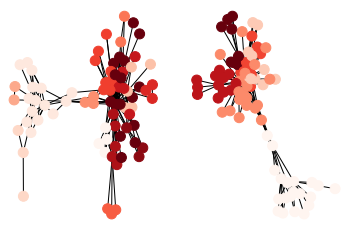

In [ ]:
color_map_lv0 = []
color_map_lv1 = []
for node in gf:
    color_map_lv0.append(pt_lv0[node])
    color_map_lv1.append(pt_lv1[node])


fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.flatten()
nx.draw(gf, cmap = plt.get_cmap('Reds'), node_color=color_map_lv0, with_labels=False, ax=ax[0], node_size=100)
ax[0].set_axis_off()
nx.draw(gf, cmap = plt.get_cmap('Reds'), node_color=color_map_lv1, with_labels=False, ax=ax[1], node_size=100)
ax[1].set_axis_off()

Calculating the best partition:

In [ ]:
part=community.best_partition(gf)
communities=community.modularity(part,gf)
community.modularity(part, gf)

0.43415635589011164

For the reference: Before it was understood that NetworkX can take the data provided as input, it was attempted to write a function for accessing different  node and edge attributes in the .gexf file. The code is left below to be assesed together with the rest of the work.

In [ ]:
import xml.etree.ElementTree as ET
from os import listdir
from os.path import isfile, join

In [ ]:
class DataSet:
  def __init__(self, folder):
    def addMovie(file):
      movieId = file.split('.')[0]
      tree = ET.parse(join(folder, file))
      root = tree.getroot()
      movie = Movie(int(movieId))
      print(movieId)
      for character in root[1][2]:
        actor = Actor(character.attrib['id'], 
                      character.attrib['label'], 
                      character[0][1].attrib['value'], 
                      character[0][2].attrib['value'], 
                      character[0][3].attrib['value'], 
                      character[0][4].attrib['value'], 
                      character[0][5].attrib['value'], 
                      character[0][6].attrib['value'], 
                      character[1].attrib['value'], 
                      (character[2].attrib['x'], character[2].attrib['y']), 
                      (character[3].attrib['r'], character[3].attrib['g'], character[3].attrib['b']))
        movie.addActor(actor)
      self.movies.append(movie)

    self.movies = []
    for f in listdir(folder):
      addMovie(f)

class Movie:
  def __init__(self, id):
    self.id = id
    self.actors = []

  def addActor(self, actor):
    self.actors.append(actor)

class Actor:
  def __init__(self, id, label, eccentricity, closnesscentrality, betweenesscentrality, degree, componentnumber, modularity_class, size, position, color):
    self.id = id
    self.label = label
    self.eccentricity = eccentricity
    self.closnesscentrality = closnesscentrality
    self.betweenesscentrality = betweenesscentrality
    self.degree = degree
    self.componentnumber = componentnumber
    self.modularity_class = modularity_class
    self.size = size
    self.position = position
    self.color = color

In [ ]:
DataSet('/content/drive/MyDrive/CoolData/data gang')

110
120
104
100
111
108
102
107
116
118
119
106
103
11
112
115
1
10
123
113
109
122
114
101
117
129
143
162
161
163
131
133
134
154
148
132
164
153
139
127
146
14
124
145
155
135
157
137
144
141
13
125
147
149
128
152
158
142
138
151
136
130
126
159
150
15
166
175
199
186
170
189
19
191
200
180
182
169
204
208
205
206
195
185
192
174
168
198
177
187
165
194
196
176
183
190
197
17
178
193
171
173
167
184
179
201
248
23
236
227
244
213
232
239
216
230
231
22
246
240
238
221
234
242
222
224
245
218
243
24
211
220
229
249
212
219


IndexError: ignored